# Interactive influence lines #

![figuur 1](data/data_interactive_influence_lines/Structure_simple_cantilever.gif)

In [1]:
import sympy as sp

In [2]:
import numpy as np
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

In [3]:
EI, x = sp.symbols('EI, x',real=True)

In [4]:
Av, Am = sp.symbols('Av, Am',real=True)
a, L= sp.symbols('a, L ',positive=True,real=True)
C1, C2, C3, C4 = sp.symbols('C1, C2, C3, C4')

In [5]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,0),0)
eq4 = sp.Eq(M.subs(x,L),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L,5),(a,2),(EI,5000)])
V_numpy = sp.lambdify([L,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L,5),(a,2),(EI,5000)])
M_numpy = sp.lambdify([L,a,EI,x],M_sol.rewrite(sp.Piecewise))

## Find M-line ##

Piecewise((0, x > 2), (x - 2, x > 0), (0, True))

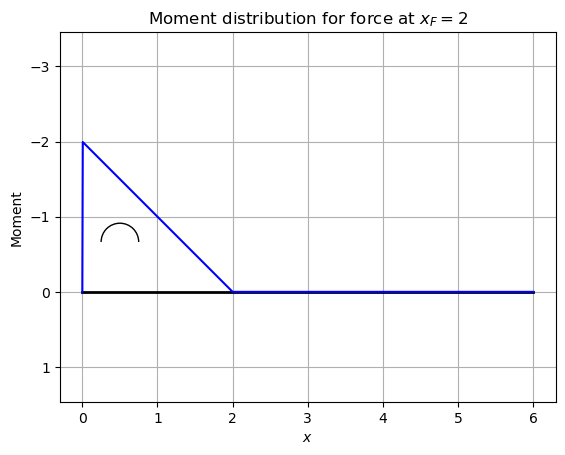

In [6]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) + 1 * sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3
w = sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,-1),0)
eq4 = sp.Eq(M.subs(x,L),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L,6),(a,2),(EI,1500)])
V_numpy = sp.lambdify([L,a,EI,x],V_sol.rewrite(sp.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L,6),(a,2),(EI,1500)])
display(sp.simplify(M_subs.rewrite(sp.Piecewise)))
M_numpy = sp.lambdify([L,a,EI,x],M_sol.rewrite(sp.Piecewise))
x_plot = np.linspace(0,6,1000)

plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_numpy(L=6,a=2,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Moment distribution for force at $x_F =  2 $'
axs.set_title(title0)
axs.axis('equal')
vervormingsteken = Arc(xy = [0.5,M_numpy(L=6,a=2,EI=1500,x=0.01)*1/3],width = 0.5, height = 0.5,theta1=180,theta2=0)
axs.add_patch(vervormingsteken);

##  Finding influence line for M ##

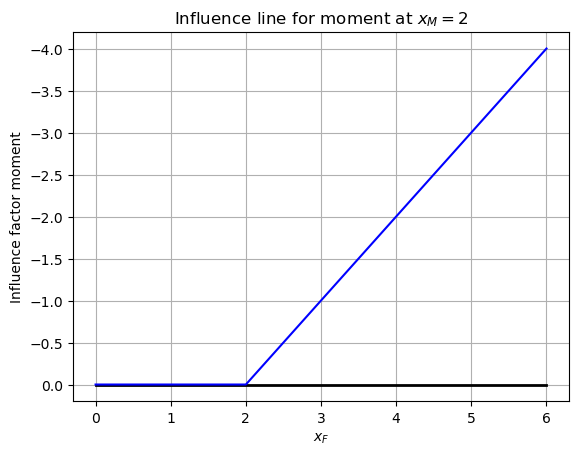

In [7]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) 
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 + sp.SingularityFunction(x,a,0)
w = -sp.integrate(phi,x)+C4
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,-1),0)
eq4 = sp.Eq(M.subs(x,L),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L,5),(a,2),(EI,5000)])
#display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
M_inf_numpy = sp.lambdify([L,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,6,1000)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L=6,a=2,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 2$'
axs.set_title(title0);

## Comparison M-line and influence line for moment at $x = ...$ #

In [8]:
def func(a,b):
    x = np.linspace(0,6,200)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,6],[0,0],color='black',linewidth=2)
    axs[0].grid()
    #axs[0].axis('equal')
    axs[0].plot(x,M_numpy(6,b,1500,x),color='blue')
    axs[0].plot(a,M_numpy(6,b,1500,a),marker='o')
    axs[0].annotate('%.2f kNm' % M_numpy(6,b,1500,a),xy = [a,M_numpy(6,b,1500,a)+0.2])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-0.4), arrowprops=dict(arrowstyle='simple'))
    #vervormingsteken = Arc(xy = [b,-M_numpy(6,b,1500,b)*1/3],width = M_numpy(6,b,1500,b)/3, height = M_numpy(6,b,1500,b)/3,theta1=180,theta2=0)
    #axs[0].add_patch(vervormingsteken);
    #axs[0].set_ylim([-6,0])
    axs[0].invert_yaxis()
    title0 = 'Moment distribution for force at $x_F = '+str(b)+'$, showing moment at $x_M = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,6],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,M_inf_numpy(6,a,1500,x),color='blue')
    axs[1].plot(b,M_inf_numpy(6,a,1500,b),marker='o')
    axs[1].annotate('%.2f kNm' % M_inf_numpy(6,a,1500,b),xy = [b,M_inf_numpy(6,a,1600,b)+0.2])
    axs[1].invert_yaxis()
    title1 = 'Influence line for moment at $x_M = '+str(a)+'$'
    axs[1].set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location moment $x_M =$ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location unit load $x_F = $ ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location moment $x_M =$ ... (m)', layout=Layout(widt…

# Find V-line #

In [9]:
def vervormingV(locationx,locationy,scale,flip=0,rotation=0):
    axs = plt.gca()
    vx = [-0.5,0,0,0.5]
    if flip==0:
        vy = [0.25,0.25,-0.25,-0.25]
    elif flip==1:
        vy = [-0.25,-0.25,0.25,0.25]
    vxr= np.add(np.multiply(np.cos(rotation/180*np.pi),vx),np.multiply(np.sin(rotation/180*np.pi),vy))
    vyr= np.add(np.multiply(np.sin(rotation/180*np.pi),vx),-np.multiply(np.cos(rotation/180*np.pi),vy))
    vxscaled = np.add(locationx,np.multiply(scale,vxr))
    vyscaled = np.add(locationy,np.multiply(scale,vyr))
    axs.plot(vxscaled,vyscaled,color='black',linewidth=1)
    axs.axis('equal')

Piecewise((0, x > 2), (-oo, Eq(x, 0)), (1, x > 0), (0, True))

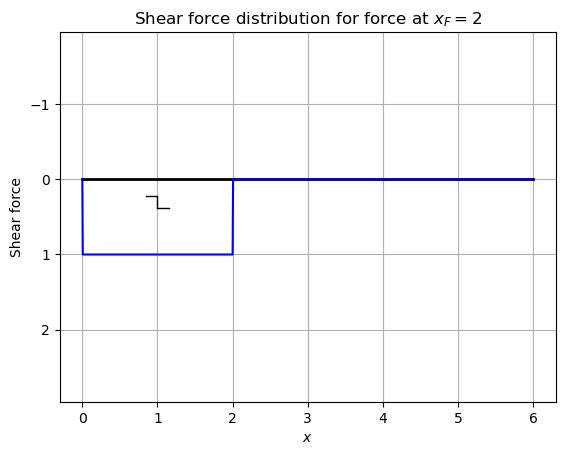

In [10]:
display(sp.simplify(V_subs.rewrite(sp.Piecewise)))

x_plot = np.linspace(-0.0001,6,1000)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_numpy(L=6,a=2,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Shear force distribution for force at $x_F =  2 $'
vervormingV(1,0.3,0.3,0)
axs.set_title(title0);

## Find influence line V ##

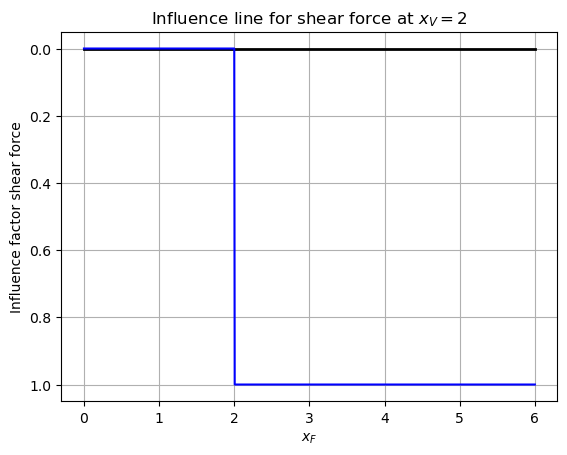

In [11]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) 
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 
w = -sp.integrate(phi,x)+C4 + sp.SingularityFunction(x,a,0)
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,-1),0)
eq4 = sp.Eq(M.subs(x,L),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L,6),(a,2),(EI,1500)])
#display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
V_inf_numpy = sp.lambdify([L,a,EI,x],w_sol.rewrite(sp.Piecewise))

x_plot = np.linspace(0,6,1000)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,V_inf_numpy(L=6,a=2,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor shear force')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for shear force at $x_V = 2$'
axs.set_title(title0);

## Comparison V-line and influence line for shear force at $x = ...$ #

In [12]:
def func(a,b):
    x = np.linspace(-0.0001,6,200)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,6],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,V_numpy(6,b,1500,x),color='blue')
    axs[0].plot(a,V_numpy(6,b,1500,a),marker='o')
    axs[0].annotate('%.2f kN' % V_numpy(6,b,1500,a),xy = [a,V_numpy(6,b,1500,a)+0.2])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-0.3), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    plt.sca(axs[0])
    vervormingV(b/2,V_numpy(6,b,1500,x)[1]/2,V_numpy(6,b,1500,x)[1]/2,0)
    title0 = 'Shear force distribution for force at $x_F = '+str(b)+'$, showing shear force at $x_V = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,6],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,V_inf_numpy(6,a,1500,x),color='blue')
    axs[1].plot(b,V_inf_numpy(6,a,1500,b),marker='o')
    axs[1].annotate('%.2f kN' % V_inf_numpy(6,a,1500,b),xy = [b,V_inf_numpy(6,a,1500,b)+0.2])
    axs[1].invert_yaxis()
    title1 = 'Influence line for shear force at $x_V = '+str(a)+'$'
    axs[1].set_title(title1)
    
interact(func, a = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location shear force $x_V$ = ... (m)",readout_format='.1f',style= {'description_width': '200px'},layout = {'width': '450px'}),
         b = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '200px'},layout = {'width': '450px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location shear force $x_V$ = ... (m)', layout=Layout…

# Find displacement $w$

Piecewise((x/750 - 1/1125, x > 2), (x**2*(6 - x)/9000, x > 0), (0, True))

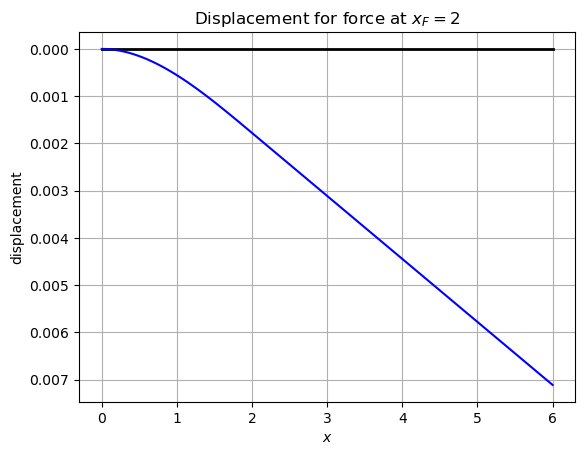

In [13]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) + 1*sp.SingularityFunction(x,a,-1)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 
w = - sp.integrate(phi,x)+C4 
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,-1),0)
eq4 = sp.Eq(M.subs(x,L+1),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L,6),(a,2),(EI,1500)])
w_numpy = sp.lambdify([L,a,EI,x],w_sol.rewrite(sp.Piecewise))
phi_sol = phi.subs(sol)
phi_subs = phi_sol.subs([(L,6),(a,2),(EI,1500)])
phi_numpy = sp.lambdify([L,a,EI,x],phi_sol.rewrite(sp.Piecewise))

display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
x_plot = np.linspace(0,6,100)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,w_numpy(L=6,a=2,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('displacement')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Displacement for force at $x_F =  2 $'
axs.set_title(title0);

# Find influence line $w$

Piecewise((x/750 - 1/1125, x > 2), (x**2*(6 - x)/9000, x > 0), (0, True))

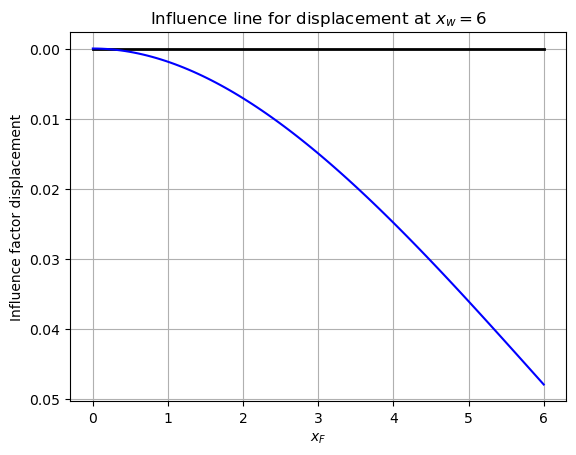

In [14]:
display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
x_plot = np.linspace(0,6,100)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,w_numpy(L=6,a=6,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor displacement')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for displacement at $x_w =  6 $'
axs.set_title(title0);

## Comparison displacement and influence line for displacement at $x = ...$ #

In [15]:
def func(a,b):
    x = np.linspace(0,6,100)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,6],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].plot(x,w_numpy(6,b,1500,x),color='blue')
    axs[0].plot(a,w_numpy(6,b,1500,a),marker='o')
    axs[0].annotate('%.2f mm' % np.round(w_numpy(6,b,1500,a)*1000,2),xy = [a,w_numpy(6,b,1500,a)-0.00005])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-0.01), arrowprops=dict(arrowstyle='simple'))
    axs[0].set_ylim([-0.009,0.05])
    axs[0].invert_yaxis()
    title0 = 'Displacement for force at at $x_F = '+str(b)+'$, showing displacement at $x_w = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,6],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].plot(x,w_numpy(6,a,1500,x),color='blue')
    axs[1].plot(b,w_numpy(6,a,1500,b),marker='o')
    axs[1].annotate('%.2f mm' % np.round(w_numpy(6,a,1500,b)*1000,2),xy = [b,w_numpy(6,a,1500,b)-0.00005])
    axs[1].set_ylim([-0.009,0.05])
    axs[1].invert_yaxis()
    title1 = 'Influence line for displacement at $x_w = '+str(a)+'$'
    axs[1].set_title(title1)

    
interact(func, a = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location displacement $x_w$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}),
         b = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location displacement $x_w$ = ... (m)', layout=Layou…

# Find rotation line $\phi$

Piecewise((-1/750, x > 2), (x*(x - 4)/3000, x > 0), (0, True))

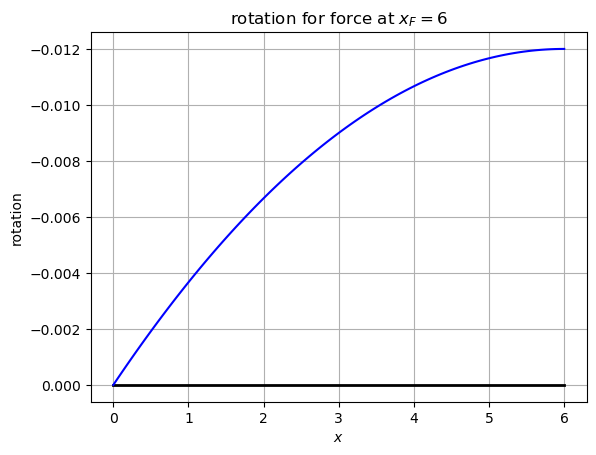

In [16]:
display(sp.simplify(phi_subs.rewrite(sp.Piecewise)))
x_plot = np.linspace(0,6,100)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,phi_numpy(L=6,a=6,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('rotation')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'rotation for force at $x_F =  6 $'
axs.set_title(title0);

# Find influence line $\phi$

Piecewise(((3 - x)/250, x > 6), (-x**2/3000, x > 0), (0, True))

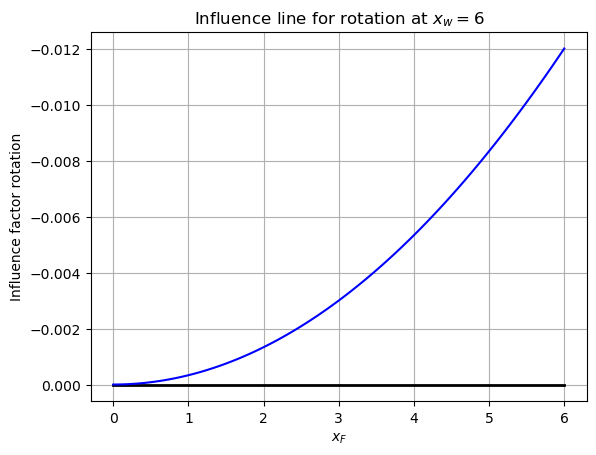

In [17]:
q = -Am * sp.SingularityFunction(x,0,-2) - Av * sp.SingularityFunction(x,0,-1) + 1*sp.SingularityFunction(x,a,-2)
V = -sp.integrate(q,x)+C1
M = sp.integrate(V,x)+C2
kappa = M / EI
phi = sp.integrate(kappa,x)+C3 
w = - sp.integrate(phi,x)+C4 
eq1 = sp.Eq(w.subs(x,0),0)
eq2 = sp.Eq(phi.subs(x,0),0)
eq3 = sp.Eq(M.subs(x,-1),0)
eq4 = sp.Eq(M.subs(x,L+1),0)
eq5 = sp.Eq(V.subs(x,-1),0)
eq6 = sp.Eq(V.subs(x,L+1),0)
sol = sp.solve([eq1,eq2,eq3,eq4,eq5,eq6],[C1,C2,C3,C4,Av,Am])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L,6),(a,6),(EI,1500)])
w_inf_numpy = sp.lambdify([L,a,EI,x],w_sol.rewrite(sp.Piecewise))

display(sp.simplify(w_subs.rewrite(sp.Piecewise)))
x_plot = np.linspace(0,6,100)
plt.plot([0,6],[0,0],color='black',linewidth=2)
plt.plot(x_plot,w_inf_numpy(L=6,a=6,EI=1500,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor rotation')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for rotation at $x_w =  6 $'
axs.set_title(title0);

## Comparison displacement with $\phi$ and influence line for $\phi$ at $x = ...$ #

In [20]:
def func(a,b):
    x = np.linspace(0,6,100)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,6],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].plot(x,w_numpy(6,b,1500,x),color='blue')
    axs[0].plot([a-0.4,a,a+0.4],[w_numpy(6,b,1500,a)+phi_numpy(6,b,1500,a)*0.4,w_numpy(6,b,1500,a),w_numpy(6,b,1500,a)-phi_numpy(6,b,1500,a)*0.4],linewidth=3)
    axs[0].plot([a-0.4,a,a+0.4],[w_numpy(6,b,1500,a),w_numpy(6,b,1500,a),w_numpy(6,b,1500,a)],color='black')
    if phi_numpy(6,b,1500,a) > 0:
        axs[0].annotate(text='', xytext=(a+0.5,w_numpy(6,b,1500,a)), xy=(a+0.5,w_numpy(6,b,1500,a)-phi_numpy(6,b,1500,a)*0.5), arrowprops=dict(arrowstyle='simple',connectionstyle="arc3,rad=.5"))
    else:
        axs[0].annotate(text='', xytext=(a+0.5,w_numpy(6,b,1500,a)), xy=(a+0.5,w_numpy(6,b,1500,a)-phi_numpy(6,b,1500,a)*0.5), arrowprops=dict(arrowstyle='simple',connectionstyle="arc3,rad=-.5"))
    axs[0].annotate('%.5f rad' % phi_numpy(6,b,1500,a),xy = [a+0.6,(w_numpy(6,b,1500,a)+w_numpy(6,b,1600,a)-phi_numpy(6,b,1500,a)*0.3)/2])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-0.01), arrowprops=dict(arrowstyle='simple'))
    axs[0].set_ylim([-0.009,0.05])
    axs[0].invert_yaxis()
    title0 = 'Rotation for force at at $x_F = '+str(b)+'$, showing rotation at $x_w = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,6],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].plot(x,w_inf_numpy(6,a,1500,x),color='blue')
    axs[1].plot(b,w_inf_numpy(6,a,1500,b),marker='o')
    axs[1].annotate('%.5f rad' % np.round(w_inf_numpy(6,a,1500,b),5),xy = [b,w_inf_numpy(6,a,1500,b)-0.00005])
    axs[1].set_ylim([-0.013,0.001])
    axs[1].invert_yaxis()
    title1 = 'Influence line for displacement at $x_w = '+str(a)+'$'
    axs[1].set_title(title1)

    
interact(func, a = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location rotation $x_\phi$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}),
         b = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location rotation $x_\\phi$ = ... (m)', layout=Layou…

## Comparison $\phi$-line and influence line for $\phi$ at $x = ...$ #

In [21]:
def func(a,b):
    x = np.linspace(0,6,100)
    fig, axs = plt.subplots(2, 1, figsize=(7, 6))
    axs[0].plot([0,6],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].plot(x,phi_numpy(6,b,1500,x),color='blue')
    axs[0].plot(a,phi_numpy(6,b,1500,a),marker='o')
    axs[0].annotate('%.3f mm' % np.round(phi_numpy(6,b,1500,a),3),xy = [a,phi_numpy(6,b,1500,a)-0.00005])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-0.003), arrowprops=dict(arrowstyle='simple'))
    axs[0].set_ylim([-0.013,0.001])
    axs[0].invert_yaxis()
    title0 = 'Rotation for force at at $x_F = '+str(b)+'$, showing rotation at $x_w = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,6],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].plot(x,w_inf_numpy(6,a,1500,x),color='blue')
    axs[1].plot(b,w_inf_numpy(6,a,1500,b),marker='o')
    axs[1].annotate('%.3f mm' % np.round(w_inf_numpy(6,a,1500,b),3),xy = [b,w_inf_numpy(6,a,1500,b)-0.00005])
    axs[1].set_ylim([-0.013,0.001])
    axs[1].invert_yaxis()
    title1 = 'Influence line for displacement at $x_w = '+str(a)+'$'
    axs[1].set_title(title1)

    
interact(func, a = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location rotation $x_\phi$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}),
         b = widgets.FloatSlider(min=0, max=6, value=2, step=0.2, description="Location force $x_F$ = ... (m)",readout_format='.1f',style= {'description_width': '250px'},layout = {'width': '500px'}) );

interactive(children=(FloatSlider(value=2.0, description='Location rotation $x_\\phi$ = ... (m)', layout=Layou…